In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("../input/housing-data/housing2 (1) (1).csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY,female
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY,male
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY,female
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845.0,330,1.5603,78100,INLAND,female
20636,-121.21,39.49,18.0,697,150.0,356.0,114,2.5568,77100,INLAND,male
20637,-121.22,39.43,17.0,2254,485.0,1007.0,433,1.7000,92300,INLAND,female
20638,-121.32,39.43,18.0,1860,409.0,741.0,349,1.8672,84700,INLAND,male


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          19335 non-null  object 
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 1.7+ MB


In [5]:
data.isnull().sum()

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            1305
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

###### there are 20640 entries and 11 coloumns ..
###### there are null values in "housing_median_age" , "total_bedrooms","population","households","median_income","gender" 

In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value
count,20640.000000,20640.000000,20382.000000,20640.000000,15758.000000,20596.000000,17873.000000,20640.000000
mean,-119.569704,35.631861,28.676283,2635.763081,539.920104,1424.928724,3.939403,206855.816909
std,2.003532,2.135952,12.589284,2181.615252,419.834171,1132.237768,1.943517,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,2.598600,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,3.587100,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,652.000000,1725.000000,4.830400,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,15.000100,500001.000000


In [7]:
data.describe(include="object")

,households,ocean_proximity,gender
count,19335,20640,16620
unique,1703,5,2
top,no,<1H OCEAN,female
freq,3080,9136,8673


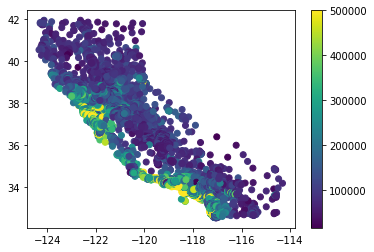

In [8]:
plt.scatter(data = data , x="longitude" , y="latitude" , c =data["median_house_value"]  )
plt.colorbar ()
plt.show()

The price of the houses next to ocean is too high compare to all other houses.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='gender'>

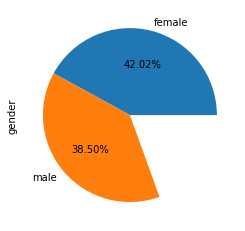

In [9]:
(data['gender'].value_counts()/data.shape[0]).plot.pie(autopct='%1.2f%%')

### there are more females than males.

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

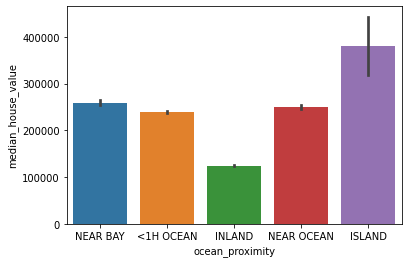

In [10]:
sns.barplot(x="ocean_proximity",y="median_house_value",data=data)

### Island houses are the most expensive,while Inland houses are the cheapest.



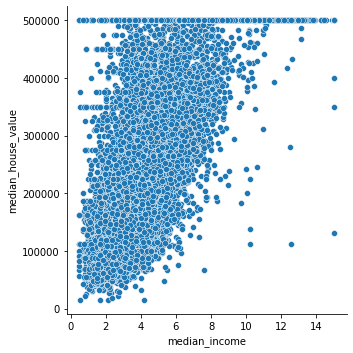

In [11]:
sns.relplot(x="median_income", y="median_house_value", data=data)

## Customers with higher income tends to buy more expensive houses.

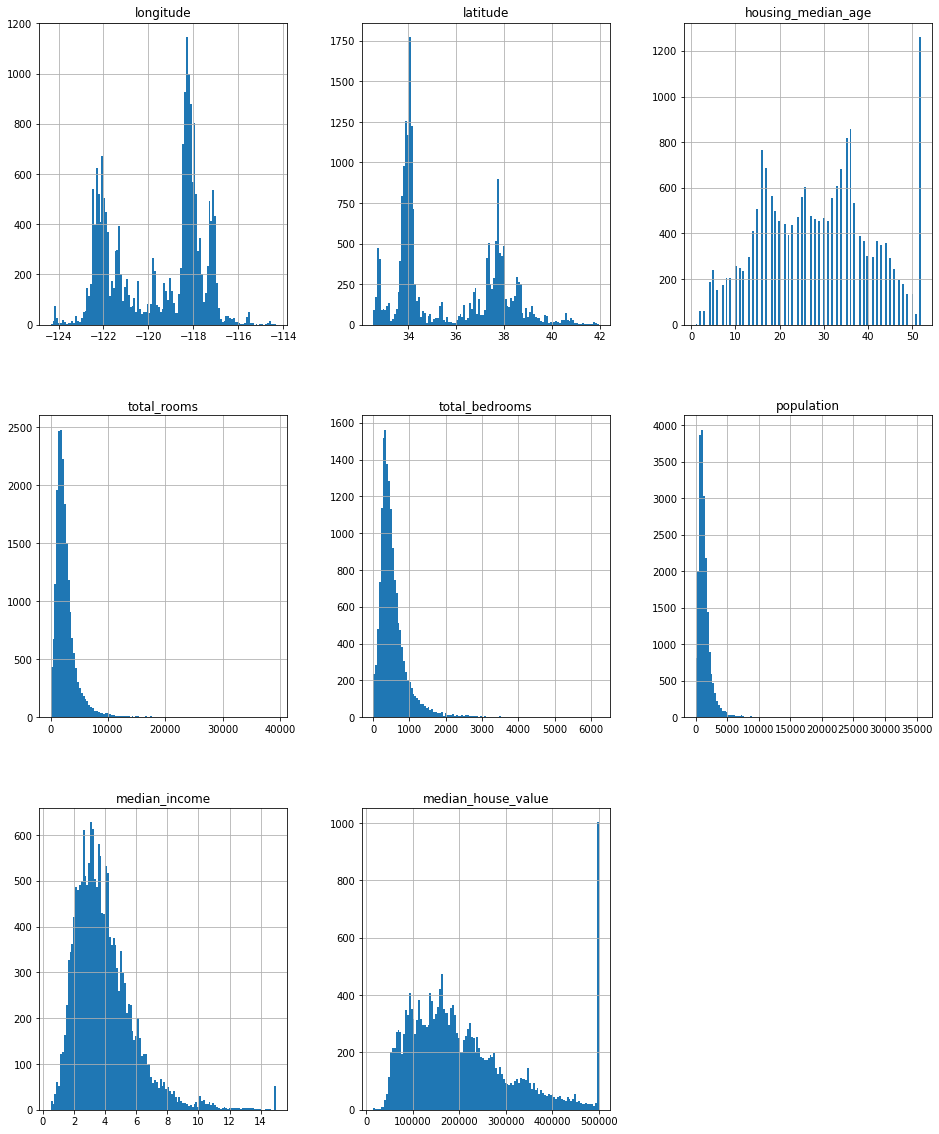

In [12]:
data.hist(bins=120 , figsize=(16,20))
plt.show()

from histograms:
- 'housing_median_age' : most of houses is between 10 to 45 years old .. and there are big number of houses above 50 year .
- 'total_rooms'and 'total_bedrooms' are almost have the same curve..
- total_rooms' has range between 0 and 10000 rooms in block  with mean= 2500 aproximatly.
- 'total_bedrooms'has range between 0 and 1000 rooms in block  with mean= 540 aproximatly.
- 'population', 'households' also have the same curve and the same range as in 'total_rooms'and 'total_bedrooms'.
- 'median_income' most of people earn between 2.5k and 5k. few people has more than 10K up to 15k , then there are a small increase of income above 15k.
- 'median_house_value' : its curve looks some how like 'median_income' curve so there are relation between them .
- 'median_house_value': most of houses values are between 50000 and 350000... there are a huge number of houses values above 500000 .

In [13]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value
count,20640.000000,20640.000000,20382.000000,20640.000000,15758.000000,20596.000000,17873.000000,20640.000000
mean,-119.569704,35.631861,28.676283,2635.763081,539.920104,1424.928724,3.939403,206855.816909
std,2.003532,2.135952,12.589284,2181.615252,419.834171,1132.237768,1.943517,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,2.598600,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,3.587100,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,652.000000,1725.000000,4.830400,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,15.000100,500001.000000


### 1.Most houses are aged between 18-37 years.
### 2.Most building blocks has rooms between 1448-3148 room.
### 3.Most building blocks has bed rooms between 336-977 room.
### 4.Most building blocks has population between 787-1725 people.
### 5.Most building blocks has households between 313-538 people.
### 6.Most people has income between 2138.050- 4583.300 pounds.
### 7.Most houses cost between 119600-264725 pounds .

In [14]:
# replace "no" to nan:
data['households'].replace("no", np.nan , inplace=True)

In [15]:
# "households" should be converted into numeric value..
data["households"]=data["households"].astype('float64')

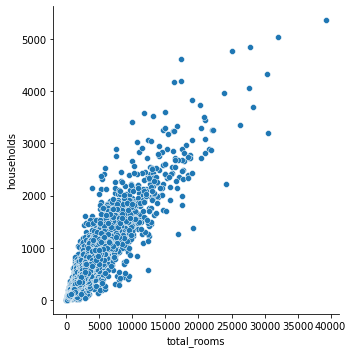

In [16]:
sns.relplot(x="total_rooms", y="households", data=data)

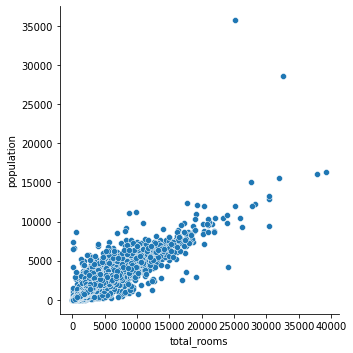

In [17]:
sns.relplot(x="total_rooms", y="population", data=data)

### as the number of rooms in a building block increase the population and households increase.

# Data Preprocessing

#### 1-Fill missing values

#### In households there are "no" value ...>>which should be null value

In [18]:
 # check whether there are another value express nan in  "ocean_proximity" or "gender"..

In [19]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [20]:
data["gender"].value_counts()

female    8673
male      7947
Name: gender, dtype: int64

In [21]:
# there aren't "no" value express nan ..

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          16255 non-null  float64
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 1.7+ MB


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          16255 non-null  float64
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 1.7+ MB


In [24]:
missing = data.isnull().sum()
missing

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            4385
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

<AxesSubplot:>

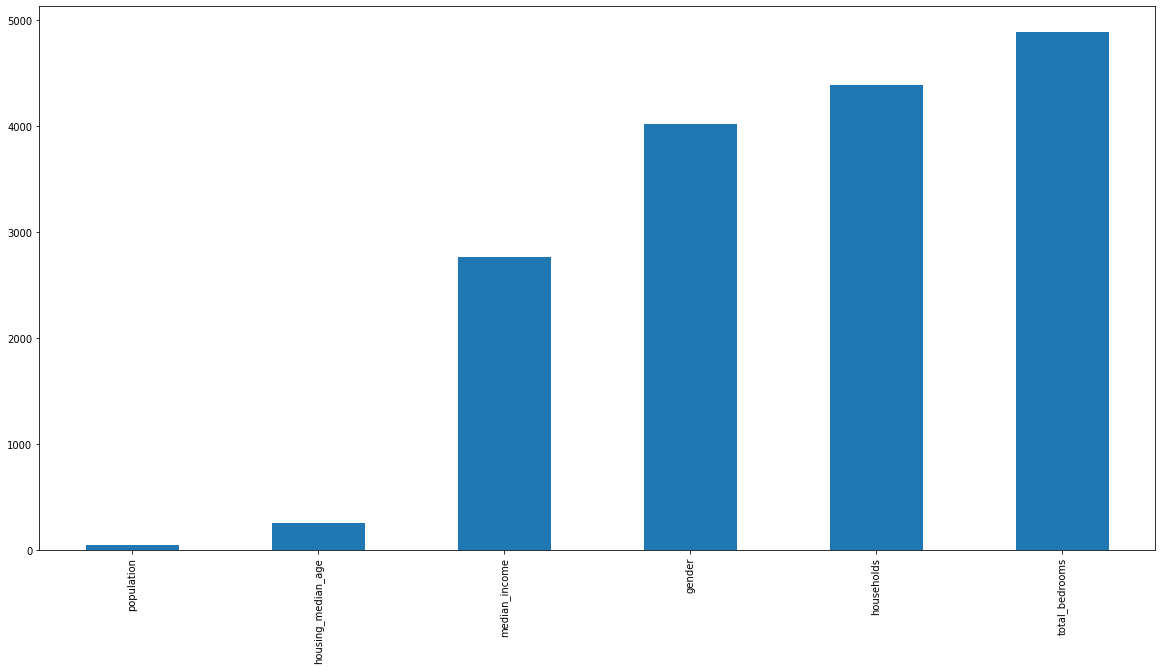

In [25]:
missing = missing[missing>0]
missing.sort_values(inplace=True)
plt.figure(figsize=(20,10))
missing.plot.bar()

In [26]:
data.isnull().sum()

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            4385
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

In [27]:
# Now , the num of null values in ["total_bedrooms","households","median_income","gender"] are big so we can't drop it 
# we will work to fill it ..

In [28]:
fill_list = ['female' , "male"]
data['gender'] = data['gender'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

In [29]:
# label encoding to "ocean_proximity" and "gender" features..
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [30]:
data["ocean_proximity"]=le.fit_transform(data["ocean_proximity"])

In [31]:
data["ocean_proximity"].value_counts()

0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

In [32]:
data["gender"]=le.fit_transform(data["gender"])

In [33]:
data["gender"].value_counts()

0    10670
1     9970
Name: gender, dtype: int64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          16255 non-null  float64
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  int64  
 10  gender              20640 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 1.7 MB


In [35]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'gender'],
      dtype='object')

In [36]:
data = data.ffill().add(data.bfill()).div(2)

In [37]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
gender                0
dtype: int64

In [38]:
#Now, no null value..

### 2-Removing outliers

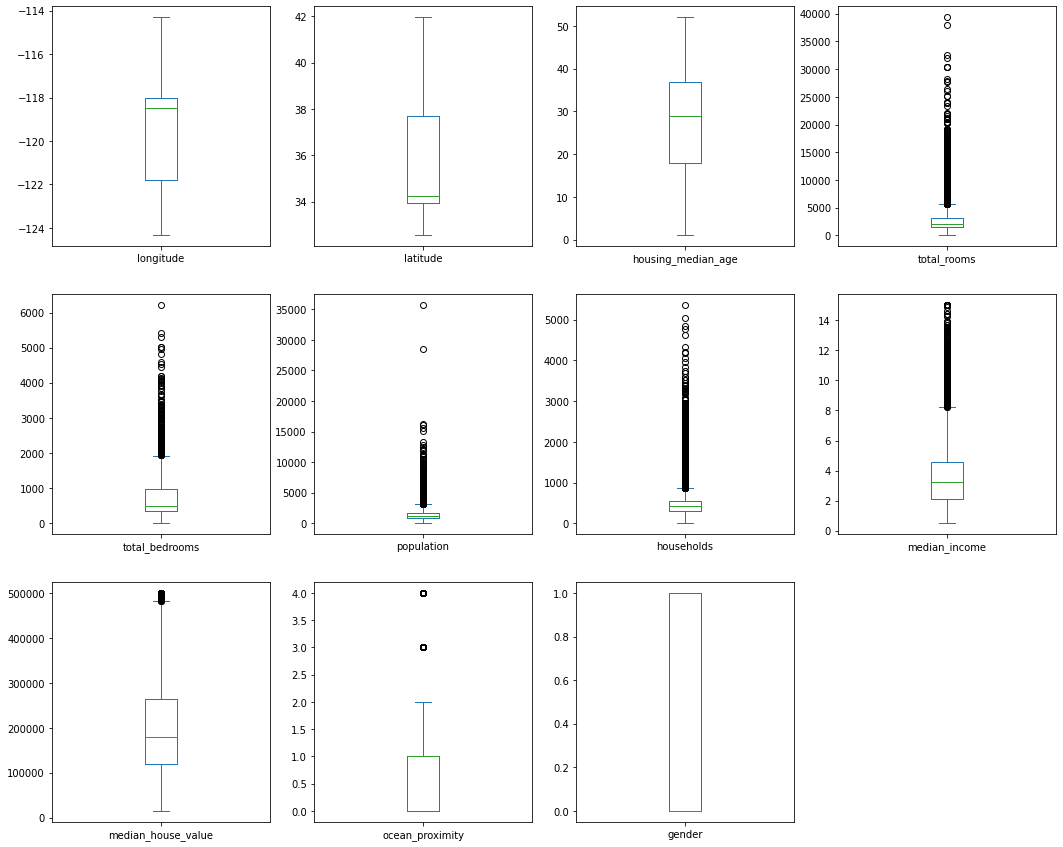

In [39]:
data.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (3,4))
plt.show()

<AxesSubplot:>

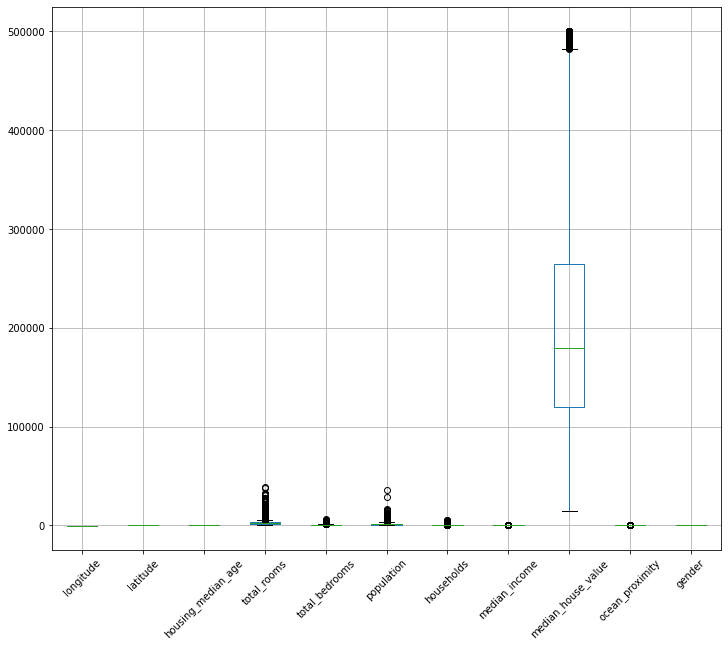

In [40]:
plt.figure(figsize=(12,10))
data.boxplot(rot=45)

In [41]:
#Define a function to determine outlier boundaries

def outlier_limits(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL, LL

In [42]:
for column in data.columns:
    if data[column].dtype != 'object':
        UL, LL = outlier_limits(data[column])
        data[column] = np.where((data[column] > UL) ,UL , np.where((data[column] < LL),LL, data[column]))


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  float64
 10  gender              20640 non-null  float64
dtypes: float64(11)
memory usage: 1.7 MB


In [44]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
gender                0
dtype: int64

-------------------------

In [45]:
# ultirnative dealing with outliers

In [46]:
#data.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (3,3))
#plt.show()

In [47]:
#sns.boxplot(x = data['total_rooms'])

In [48]:
#fig , ax = plt.subplots(figsize=(12,8))
#ax.scatter(x= data["total_rooms"],y = data["median_house_value"])
#ax.set_xlabel("total_rooms")
#ax.set_ylabel("median_house_value")
#plt.show()

In [49]:
#t_df = data[data['total_rooms']< 12000]
#fig , ax = plt.subplots(figsize=(12,6))
#ax.scatter(x= t_df["total_rooms"],y = t_df["median_house_value"])
#ax.set_xlabel("total_rooms")
#ax.set_ylabel("median_house_value")
#plt.show()

In [50]:
#from pandas.plotting import scatter_matrix
#attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
#scatter_matrix(data[attributes],figsize=(12,8))

In [51]:
#data.shape

In [52]:
# remove outliers with the help of quantile

In [53]:
#lower_limit=data["median_house_value"].quantile(0.25)
#lower_limit

In [54]:
#upper_limit=data["median_house_value"].quantile(0.95)
#upper_limit

In [55]:
#data=data[(data["median_house_value"]<upper_limit) ]

In [56]:
#data.shape

In [57]:
#from pandas.plotting import scatter_matrix
#attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
#scatter_matrix(data[attributes],figsize=(12,8))


-------------------------------

<AxesSubplot:>

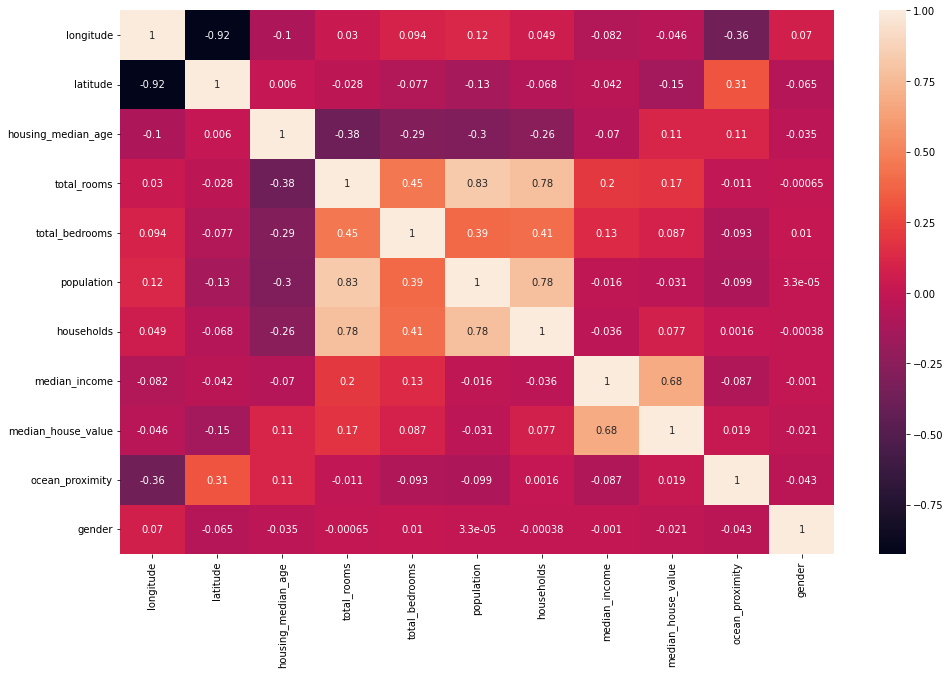

In [58]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), cbar = True , annot=True)

In [59]:
#strong corelation between "households" , "population" , "total bedrooms" and "total rooms" .
#strong corelation between "median_house_value" , "median_income". 

In [60]:
data.drop("gender",axis=1,inplace = True)

In [61]:
X = data.drop("median_house_value" , axis = 1).values
y = data['median_house_value'].values

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25 , random_state=42)

In [63]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler ()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [64]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [65]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [66]:
lr.score(X_train,y_train)

0.6116608167440845

In [67]:
lr.score(X_test,y_test)

0.6009819730390209

In [68]:
from sklearn.linear_model import Ridge
rid = Ridge()

In [69]:
rid.fit(X_train,y_train)

Ridge()

In [70]:
rid.score(X_train,y_train)

0.6116607222204589

In [71]:
rid.score(X_test,y_test)

0.600974275039033

In [72]:
y_pred = lr.predict(X_test)

In [73]:
y_pred2 = rid.predict(X_test)

In [74]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test , y_pred)
r2

0.6009819730390209

In [75]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [76]:
"""""
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2)
figure.set_size_inches(16,28)
_ = sns.regplot(data['longitude'], data['median_house_value'], ax=ax1)
_ = sns.regplot(data['latitude'], data['median_house_value'], ax=ax2)
_ = sns.regplot(data['housing_median_age'], data['median_house_value'], ax=ax3)
_ = sns.regplot(data['total_rooms'], data['median_house_value'], ax=ax4)
_ = sns.regplot(data['total_bedrooms'], data['median_house_value'], ax=ax5)
_ = sns.regplot(data['population'], data['median_house_value'], ax=ax6)
_ = sns.regplot(data['households'], data['median_house_value'], ax=ax7)
_ = sns.regplot(data['median_income'], data['median_house_value'], ax=ax8)
_ = sns.regplot(data['median_house_value'], data['median_house_value'], ax=ax9)
_ = sns.regplot(data['ocean_proximity'], data['median_house_value'], ax=ax10)
"""""

'""\nfigure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2)\nfigure.set_size_inches(16,28)\n_ = sns.regplot(data[\'longitude\'], data[\'median_house_value\'], ax=ax1)\n_ = sns.regplot(data[\'latitude\'], data[\'median_house_value\'], ax=ax2)\n_ = sns.regplot(data[\'housing_median_age\'], data[\'median_house_value\'], ax=ax3)\n_ = sns.regplot(data[\'total_rooms\'], data[\'median_house_value\'], ax=ax4)\n_ = sns.regplot(data[\'total_bedrooms\'], data[\'median_house_value\'], ax=ax5)\n_ = sns.regplot(data[\'population\'], data[\'median_house_value\'], ax=ax6)\n_ = sns.regplot(data[\'households\'], data[\'median_house_value\'], ax=ax7)\n_ = sns.regplot(data[\'median_income\'], data[\'median_house_value\'], ax=ax8)\n_ = sns.regplot(data[\'median_house_value\'], data[\'median_house_value\'], ax=ax9)\n_ = sns.regplot(data[\'ocean_proximity\'], data[\'median_house_value\'], ax=ax10)\n'

----------------------

## Business insights 

-as median income increase median housing value increase.

-The price of the houses next to ocean is too high compare to all other houses.a

# Thank You